In [2]:
import pandas as pd
from astropy.io import fits
import numpy as np
import matplotlib.pyplot as plt
import random
from scipy.optimize import curve_fit
from astropy.timeseries import LombScargle
from scipy.signal import find_peaks
import os

In [4]:
archivo = fits.open('TCampo_b279.fits')
archivo1 = fits.open('PVariablesb279.fits')
HJD=archivo[1].data
Error=archivo1[4].data
Ks=archivo1[3].data
archivo1.info()

Filename: PVariablesb279.fits
No.    Name      Ver    Type      Cards   Dimensions   Format
  0  PRIMARY       1 PrimaryHDU       4   ()      
  1  KS_ALE        1 ImageHDU         7   (1280954,)   float64   
  2  EKS_ALE       1 ImageHDU         8   (68, 100000)   float64   
  3  KS_PV         1 ImageHDU         8   (68, 181)   float64   
  4  EKS_PV        1 ImageHDU         8   (68, 181)   float64   


In [5]:
def eliminar_nan(error, ks, HJD):
    indices_validos = ~np.isnan(ks)
    error_filtrado = [error[i] for i in range(len(ks)) if indices_validos[i]]
    ks_filtrado = [ks[i] for i in range(len(ks)) if indices_validos[i]]
    HJD_filtrado = [HJD[i] for i in range(len(ks)) if indices_validos[i]]
    return error_filtrado, ks_filtrado, np.round(HJD_filtrado,8)

ks_nan=[]
error_nan=[]
HJD_na=[]
y=0
while y<len(Ks):
    error_filtrado, ks_filtrado, HJD_filtrado = eliminar_nan(Error[y], Ks[y], HJD-2400000)
    ks_nan.append(ks_filtrado)
    error_nan.append(error_filtrado)
    HJD_na.append(HJD_filtrado)
    y+=1
print(error_nan[-1])
print(ks_nan[-1])
print(HJD_na[-1])
print(len(HJD_na))

[0.099, 0.1, 0.094, 0.081, 0.1, 0.095, 0.097, 0.102, 0.102, 0.118, 0.106, 0.141, 0.103, 0.094, 0.064, 0.139, 0.112, 0.061, 0.083, 0.071, 0.061, 0.099, 0.122, 0.089, 0.103, 0.098, 0.119, 0.107, 0.073, 0.106, 0.075, 0.113, 0.102, 0.144, 0.076, 0.077, 0.064, 0.08, 0.129, 0.118, 0.13, 0.132, 0.053, 0.111, 0.116, 0.071, 0.147, 0.137, 0.125, 0.137, 0.083, 0.128, 0.14, 0.143, 0.154, 0.152, 0.1, 0.22, 0.207, 0.08, 0.095, 0.074, 0.167, 0.163, 0.139, 0.107, 0.193]
[15.859, 15.726, 15.758, 15.534, 15.802, 15.756, 15.758, 15.826, 15.787, 15.944, 15.834, 16.149, 15.795, 15.707, 15.223, 16.104, 15.908, 15.201, 15.523, 15.357, 15.172, 15.728, 15.94, 15.604, 15.743, 15.675, 15.88, 15.772, 15.263, 15.794, 15.415, 15.779, 15.707, 16.084, 15.364, 15.374, 15.139, 15.413, 15.911, 15.89, 15.975, 15.975, 14.912, 15.763, 15.872, 15.278, 16.075, 16.016, 15.845, 16.0, 15.383, 15.905, 15.926, 15.981, 16.011, 16.076, 15.563, 16.217, 16.17, 15.242, 15.373, 15.127, 16.09, 15.92, 15.945, 15.437, 16.09]
[55309.758969

In [ ]:
x=0
while x<len(ks_nan):
    serie = ks_nan[x]
    erro = error_nan[x]
    hjd = HJD_na[x]

    # Definir el nombre del archivo de texto
    nombre_archivo = "Datosb279"+str(x)+".txt"

    with open(nombre_archivo, "w") as archivo:
        for h, s, e in zip(hjd, serie, erro):
            archivo.write("{:<15} {:<10} {:<6}\n".format(h, s, e))
    x+=1
print("hecho")

In [ ]:
S=ks_nan[0]
Date=HJD_na[0]
# Calcular el espectro de potencia utilizando Lomb-Scargle
frequency, power = LombScargle(Date, S).autopower()

# Plotear el espectro de potencia
plt.plot(frequency, power)
plt.xlabel('Frecuencia')
plt.ylabel('Espectro de Potencia')
plt.title('Espectro de Potencia de la Serie Temporal')
# Guarda la gráfica en un archivo
#plt.savefig('serie_potencias2_b279.png')

plt.show()

In [ ]:
# Encontrar picos en el espectro de potencia
peaks, _ = find_peaks(power)
# Obtener los 5 picos más significativos
sorted_peaks = sorted(peaks, key=lambda x: power[x], reverse=True)[:5]

# Plotear el espectro de potencia
plt.plot(frequency, power)
plt.plot(frequency[sorted_peaks], power[sorted_peaks], "x", markersize=10, color='r')  # Marcar los picos
plt.xlabel('Frecuencia')
plt.ylabel('Espectro de Potencia')
plt.title('Espectro de Potencia de la Serie Temporal con los 5 Picos Más Significativos Resaltados')
# Guarda la gráfica en un archivo
#plt.savefig('serie_potencias2_b279_5_picos.png')

plt.show()

In [ ]:
frecuencia, potencia= frequency[sorted_peaks], list(power[sorted_peaks])
max_p=max(potencia)
r = potencia.index(max_p)
f=frecuencia[r]
P=1/f
print(P)


In [ ]:
P=12.928267861356147
t_0 = Date[0]

# 3. Calcular la fase para cada punto de tus datos
fase = ((Date - t_0) / P) - np.floor((Date - t_0) / P)
plt.scatter(fase, S)
plt.xlabel('Fase')
plt.ylabel('V_ks')
# Invertir el eje y
plt.gca().invert_yaxis()
plt.title('Curva de luz en términos de la fase')
# Muestra la leyenda con el período promedio
plt.legend(['Periodo= {:.2f} días'.format(P)])
# Guarda la gráfica en un archivo
#plt.savefig('Curva3_b279.png')
plt.show()

In [ ]:
y=0
freq=[]
powe=[]
peri=[]
nombre=[]
while y<len(ks_nan):
    S=ks_nan[y]
    Date=HJD_na[y]
    # Calcular el espectro de potencia utilizando Lomb-Scargle
    frequency, power = LombScargle(Date, S).autopower()
    # Encontrar picos en el espectro de potencia
    peaks, _ = find_peaks(power)
    # Obtener los 5 picos más significativos
    sorted_peaks = sorted(peaks, key=lambda x: power[x], reverse=True)[:5]
    frecuencia, potencia= frequency[sorted_peaks], list(power[sorted_peaks])
    max_p=max(potencia)
    r = potencia.index(max_p)
    f=frecuencia[r]
    P=1/f
    nombre.append("Datosb279"+str(y)+".txt")
    freq.append(f)
    powe.append(max_p)
    peri.append(P)
    y+=1

In [ ]:
# Ordenar las listas basadas en la lista powe
sorted_data = sorted(zip(powe, freq, peri, nombre), reverse=True)

# Desempaquetar las listas ordenadas
powe, freq, peri, nombre = zip(*sorted_data)

print("powe:", powe)
print("nombre:", nombre)

In [ ]:
# Nombre del archivo de texto
nombre_archivo = "B279.txt"
# Guardar en archivo de texto
with open(nombre_archivo, "w") as archivo:
    for n in nombre:
        archivo.write(n + "\n") 

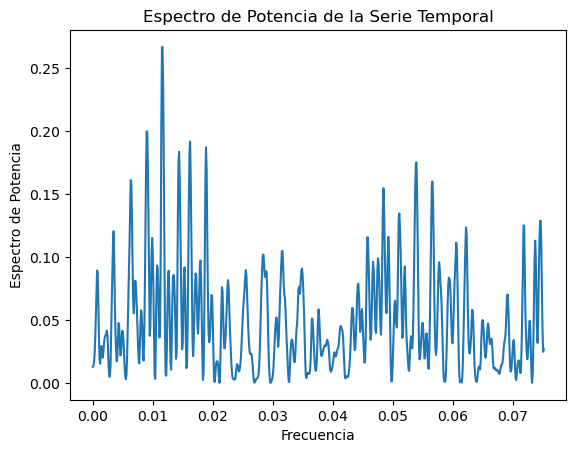

In [27]:
S=ks_nan[50]
Date=HJD_na[50]
# Calcular el espectro de potencia utilizando Lomb-Scargle
frequency, power = LombScargle(Date, S).autopower()

# Plotear el espectro de potencia
plt.plot(frequency, power)
plt.xlabel('Frecuencia')
plt.ylabel('Espectro de Potencia')
plt.title('Espectro de Potencia de la Serie Temporal')
# Guarda la gráfica en un archivo
#plt.savefig('serie_potencias2_b279.png')

plt.show()

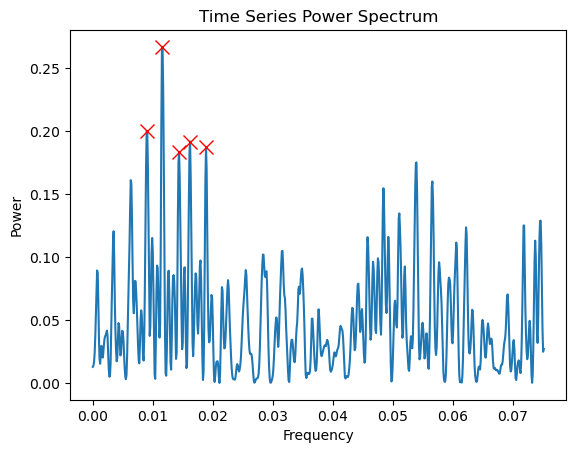

In [31]:
# Encontrar picos en el espectro de potencia
peaks, _ = find_peaks(power)
# Obtener los 5 picos más significativos
sorted_peaks = sorted(peaks, key=lambda x: power[x], reverse=True)[:5]

# Plotear el espectro de potencia
plt.plot(frequency, power)
plt.plot(frequency[sorted_peaks], power[sorted_peaks], "x", markersize=10, color='r')  # Marcar los picos
plt.xlabel('Frequency')
plt.ylabel('Power')
plt.title('Time Series Power Spectrum')
# Guarda la gráfica en un archivo
#plt.savefig('serie_potencias2_b279_5_picos.png')

plt.show()

In [29]:
frecuencia, potencia= frequency[sorted_peaks], list(power[sorted_peaks])
max_p=max(potencia)
r = potencia.index(max_p)
f=frecuencia[r]
P=1/f
print(P)
print(frecuencia)

86.51118449955943
[0.0115592  0.00901312 0.01624398 0.01889191 0.01441081]


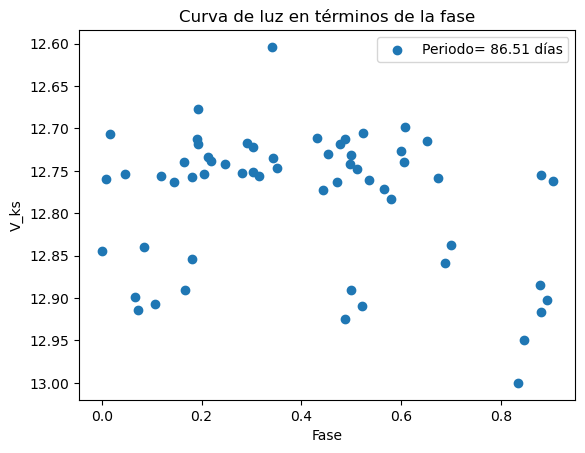

In [30]:
t_0 = Date[0]

# 3. Calcular la fase para cada punto de tus datos
fase = ((Date - t_0) / P) - np.floor((Date - t_0) / P)
plt.scatter(fase, S)
plt.xlabel('Fase')
plt.ylabel('V_ks')
# Invertir el eje y
plt.gca().invert_yaxis()
plt.title('Curva de luz en términos de la fase')
# Muestra la leyenda con el período promedio
plt.legend(['Periodo= {:.2f} días'.format(P)])
# Guarda la gráfica en un archivo
#plt.savefig('Curva3_b279.png')
plt.show()